# Project 2

For project 2, I will once again use the MovieLens dataset.  The reason for this is pretty simple:  It has 2 clearly defined sets of nodes that make it relatively ideal for analyzing as a bipartite graph (users and movies).

The first step is to read the data in and transform it to a graph object for analysis.  Again, the ReadData function is identical to project1 and only reads the raw data files into memory.  It is not custom built for this project and was borrowed from the following online source:  http://www.eecs.wsu.edu/~yyao/DirectedStudyI/Datasets/MovieLens/ReadData.py

The generateDailyGraph function from AnalyzeData.py is custom written however.  It transforms the in memory representation of the MovieLens data to a newtworkx graph object.  Note this is a departure from project1 where I used iGraph for analysis.  The reason for the switch was two fold:  1) to gain some breadth of knowledge with different python graph libraries and 2) networkx has some very useful prebuilt functions for bipartite graph analysis.

The following code reads the data in, converts it to a graph and plots it out in a typical bipartite graph layout (users are the left group, movie nodes are the right group).

Full bipartite graph


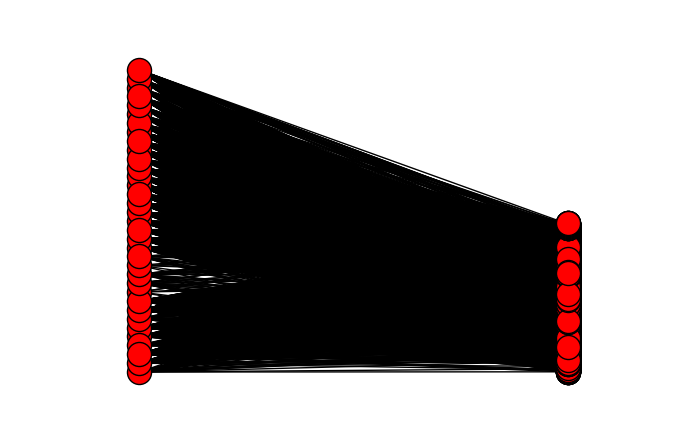

In [2]:
import ReadData;
import AnalyzeData;
from copy import deepcopy;
from igraph import *
from scipy import stats
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

ReadData.readUserInfo();
ReadData.readMovieInfo();
ReadData.readRatingInfo();
dates = ReadData.dateDict;
dateLi = dates['2000-04-26']; # change the date here if desired.  The selected date only has 3 users.
g, movies, users = AnalyzeData.generateDailyGraph(dateLi);

# generate visual for full bipartite graph
print 'Full bipartite graph'
pos = dict()
pos.update((n, (1, i * 100)) for i, n in enumerate(users)) # put nodes from users at x=1
pos.update((n, (2, i)) for i, n in enumerate(movies)) # put nodes from movies at x=2
nx.draw(g, pos=pos)
plt.show()
plt.clf()


We will now convert the two mode graph into a one mode, user only graph.

Projected One Mode Users Graph


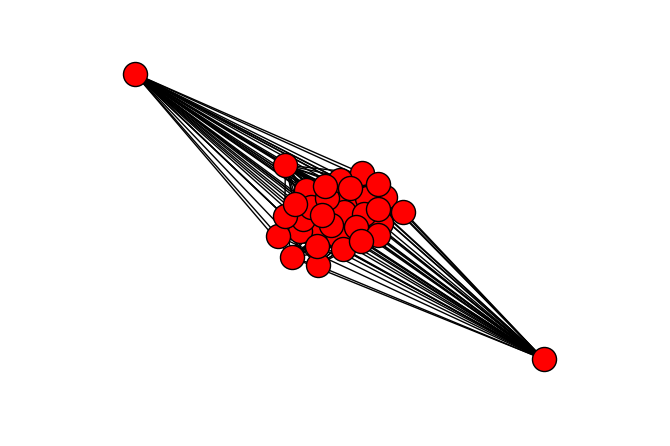

In [3]:
    # project bipartite graph onto user nodes
    from networkx.algorithms import bipartite
    print 'Projected One Mode Users Graph'
    U1 = bipartite.projected_graph(g, users)
    nx.draw(U1)
    plt.show()
    #plt.savefig('Users_one_mode.png')
    plt.clf()

We will define a peer as a connection in our one mode graph.  Lets look at the number of peers for all users.

In [5]:
import pandas as pd
# Determine number of peers for each user
peers = []
for u in users:
    peers.append(U1.degree(u))

users_df = pd.DataFrame({'num_peers': peers, 'name': list(users)})
print users_df

     name  num_peers
0   U6027         30
1   U6022         32
2   U6023         32
3   U6029         32
4   U6015         30
5   U6014         32
6   U6017         31
7   U6016         34
8   U6011         33
9   U6010         24
10  U6013         27
11  U6012         23
12  U6039         18
13  U6038         18
14  U6019         31
15  U6018         34
16  U6033         32
17  U6032         32
18  U6031         33
19  U6030         30
20  U6037         34
21  U6036         34
22  U6006         31
23  U6007         33
24  U6028         32
25  U6035         33
26  U6024         33
27  U6025         34
28  U6026         33
29  U6034         23
30  U6020         30
31  U6021         34
32  U6008         31
33  U6009         31
34  U6040         32


In [6]:
    print('')
    print('')
    print('Summary Statistics for Friend Counts')
    print('Min: %d' % min(peers))
    print('Max: %d' % max(peers))
    print('Avg: %d' % np.mean(peers))
    print('Std: %d' % np.std(peers))



Summary Statistics for Friend Counts
Min: 18
Max: 34
Avg: 30
Std: 4


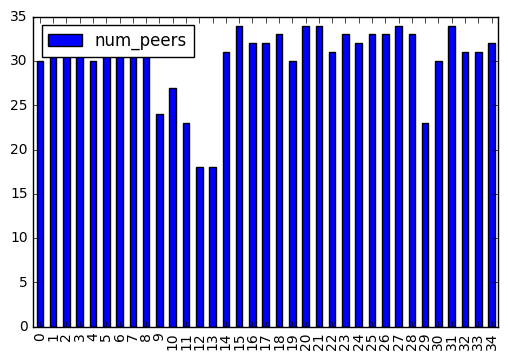

In [8]:
users_df.plot.bar()
plt.show()
plt.clf()


The users are fairly interconnected.  This indicates that there is a baseline amount of common preference among movie viewers.

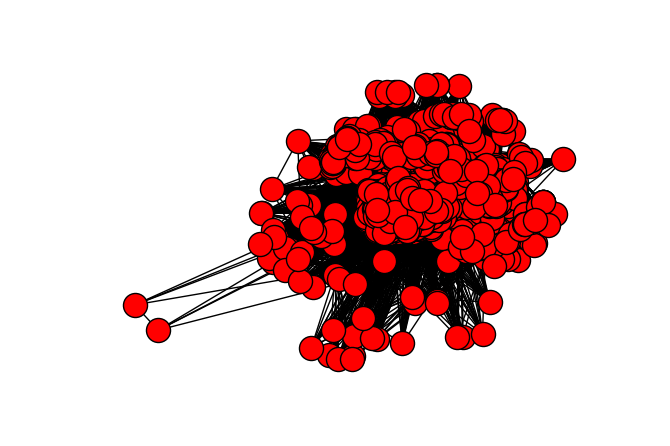

In [13]:
# project bipartite graph onto user nodes
M1 = bipartite.projected_graph(g, movies)
nx.draw(M1)
plt.show()
plt.clf()

We will repeat the procedure for a one mode network for our movie nodes.

In [10]:
# Determine number of similar movies for each movie
num_similar_movies = []
for m in movies:
    num_similar_movies.append(M1.degree(m))

movies_df = pd.DataFrame({'num_similar_movies': num_similar_movies, 'movie_id': list(movies)})
print movies_df

     movie_id  num_similar_movies
0       M1648                 583
1       M1645                 539
2       M1644                 477
3       M1646                 736
4       M1641                1071
5       M1643                1014
6       M1642                 887
7       M3379                 174
8       M1731                 279
9       M1730                 887
10      M1885                1176
11      M1732                 657
12      M1883                1176
13      M1882                1316
14       M546                 314
15      M1888                1363
16      M1399                 887
17      M1461                 557
18      M1392                1176
19      M1391                1440
20      M1465                 887
21      M1396                1324
22      M1395                1176
23      M1466                 736
24      M2759                1176
25      M1089                 786
26      M1088                 325
27      M1086                 174
28      M1085 

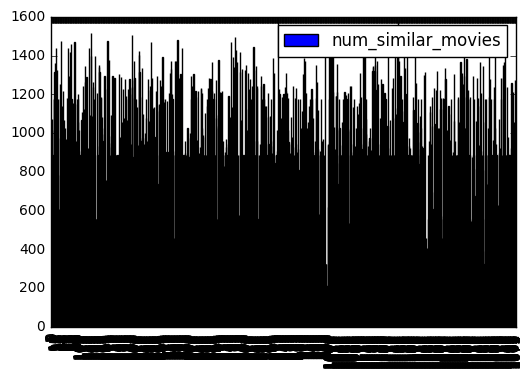

In [12]:
movies_df.plot.bar()

plt.show()
plt.clf()

There is far more variation between the connections in our movie node subset.  One could say that movies are more independent of each other than the set of people who participated in the MovieLens data set.  I think this is an intuitive result.

We will repeat the procedure for the movie nodes with a weighted projected one mode graph.

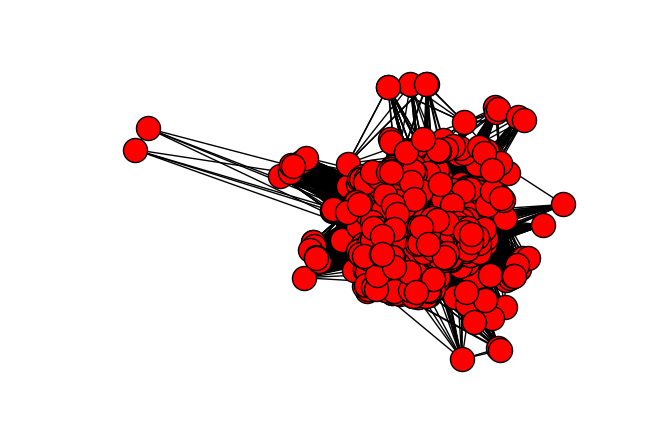

In [16]:
# project weighted bipartite graph onto movie nodes
M2 = bipartite.weighted_projected_graph(g, movies)
nx.draw(M2)
plt.show()
#plt.savefig('Movies_one_mode_weighted.png')
plt.clf()

In [17]:
    
    num_similar_movies = []
    for m in movies:
        num_similar_movies.append(M2.degree(m))

    movies_df_w = pd.DataFrame({'num_similar_movies': num_similar_movies, 'movie_id': list(movies)})
    print movies_df_w

     movie_id  num_similar_movies
0       M1648                 583
1       M1645                 539
2       M1644                 477
3       M1646                 736
4       M1641                1071
5       M1643                1014
6       M1642                 887
7       M3379                 174
8       M1731                 279
9       M1730                 887
10      M1885                1176
11      M1732                 657
12      M1883                1176
13      M1882                1316
14       M546                 314
15      M1888                1363
16      M1399                 887
17      M1461                 557
18      M1392                1176
19      M1391                1440
20      M1465                 887
21      M1396                1324
22      M1395                1176
23      M1466                 736
24      M2759                1176
25      M1089                 786
26      M1088                 325
27      M1086                 174
28      M1085 

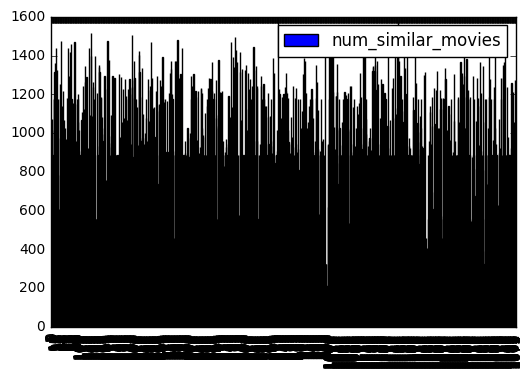

In [18]:
movies_df_w.plot.bar()

plt.show()
plt.clf()

In this particular case, the weighting the connections of movie nodes in the one mode network does not provide any immediate, obvious additional insight.